In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, rdFingerprintGenerator
from rdkit.Chem.Draw import MolsToGridImage
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

В данном ноутбуке мы:

    1. Проанализируем данные и проведем процедуру очистки данных;
    2. Стандартизуем данные;
    3. Сгенерируем фингерпринты для молекул;
    4. Построим baseline модель для предсказания значения липофильности;

# Работа с молекулами в rdkit

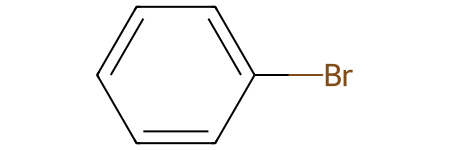

In [2]:
mol = Chem.MolFromSmiles('c1ccccc1Br')
mol

In [3]:
mol = Chem.MolFromSmiles('c1cccccBr')
mol

[18:20:57] SMILES Parse Error: unclosed ring for input: 'c1cccccBr'


# Анализ и обработка данных

In [4]:
df = pd.read_csv('../data/logp_ochem_dataset.csv')

/var/folders/x6/gw8jkhr50_sdfyf0jrc9slj00000gn/T/ipykernel_17311/2421263345.py:1: DtypeWarning: Columns (14,18,23,25,28,29,32,34,35,39,40,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/logp_ochem_dataset.csv')


In [5]:
df

,SMILES,CASRN,EXTERNALID,N,NAME,NAME.1,ARTICLEID,PUBMEDID,PAGE,TABLE,...,Ionisable,comment (chemical),AssayID,UNIT {AssayID},Assay,source,# of ortho chlorides,UNIT {# of ortho chlorides},Unnamed: 43,Unnamed: 44
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,-,-,1,-,-,A1,12620073,970,1,...,NaN,NaN,NaN,-,NaN,NaN,NaN,-,NaN,NaN
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,-,-,2,-,-,A1,12620073,970,1,...,NaN,NaN,NaN,-,NaN,NaN,NaN,-,NaN,NaN
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,-,-,3,-,-,A1,12620073,970,1,...,NaN,NaN,NaN,-,NaN,NaN,NaN,-,NaN,NaN
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,-,-,4,-,-,A1,12620073,970,1,...,NaN,NaN,NaN,-,NaN,NaN,NaN,-,NaN,NaN
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,-,-,6,-,-,A1,12620073,970,1,...,NaN,NaN,NaN,-,NaN,NaN,NaN,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85837,NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C...,2578-81-6,-,9974,-,-,A120907,-,-,-,...,NaN,NaN,NaN,-,NaN,NaN,NaN,-,NaN,NaN
85838,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=C(O)C=...,20368-24-5,-,9992,-,-,A120907,-,-,-,...,NaN,NaN,NaN,-,NaN,NaN,NaN,-,NaN,NaN
85839,NC(CC1=CC=CC=C1)C(=O)NCC(=O)NCC(=O)NC(CC1=CC=C...,40204-87-3,-,9997,-,-,A120907,-,-,-,...,NaN,NaN,NaN,-,NaN,NaN,NaN,-,NaN,NaN
85840,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=CC=C1)C(...,59881-08-2,-,10002,-,-,A120907,-,-,-,...,NaN,NaN,NaN,-,NaN,NaN,NaN,-,NaN,NaN


In [6]:
df.columns

Index(['SMILES', 'CASRN', 'EXTERNALID', 'N', 'NAME', 'NAME.1', 'ARTICLEID',
       'PUBMEDID', 'PAGE', 'TABLE', 'logPow {measured}', 'UNIT {logPow}',
       'LogD {measured}', 'UNIT {LogD}', 'logPow {measured, converted}',
       'UNIT {logPow}.1', 'LogD {measured, converted}', 'UNIT {LogD}.1', 'pH',
       'UNIT {pH}', 'logPow Method', 'logPow Buffer', 'Dataset', 'Temperature',
       'UNIT {Temperature}', 'Ionic strength', 'UNIT {Ionic strength}',
       'Species', 'Test duration', 'Material Nanoparticles of Elements', 'APS',
       'UNIT {APS}', 'Explosure concentration',
       'UNIT {Explosure concentration}', 'Crystal structure of nanoparticles',
       'Ionisable', 'comment (chemical)', 'AssayID', 'UNIT {AssayID}', 'Assay',
       'source', '# of ortho chlorides', 'UNIT {# of ortho chlorides}',
       'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [7]:
df[['SMILES', 'logPow {measured}', 'UNIT {logPow}', 'pH', 'Temperature', 'UNIT {Temperature}']]

,SMILES,logPow {measured},UNIT {logPow},pH,Temperature,UNIT {Temperature}
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,1.77,Log unit,NaN,NaN,-
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,2.1,Log unit,NaN,NaN,-
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,2.2,Log unit,NaN,NaN,-
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,1.64,Log unit,NaN,NaN,-
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,1.54,Log unit,NaN,NaN,-
...,...,...,...,...,...,...
85837,NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C...,-0.02,Log unit,NaN,NaN,-
85838,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=C(O)C=...,-1.34,Log unit,NaN,NaN,-
85839,NC(CC1=CC=CC=C1)C(=O)NCC(=O)NCC(=O)NC(CC1=CC=C...,-1.51,Log unit,NaN,NaN,-
85840,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=CC=C1)C(...,-1.03,Log unit,NaN,NaN,-


In [8]:
df['UNIT {logPow}'].unique()

array(['Log unit', '-', '0.71', '1.95', '2.03', '2.2', '1.16', '1.9',
       '0.41', '2.08', '0.58', '2.44', '2.8', '3.03', '1.56', '2.52',
       '3.41', '0.66', '0.75', '2.75', '2.42', '3.1', '2.74', '/'],
      dtype=object)

In [9]:
df = df[df['UNIT {logPow}'] == 'Log unit'][['SMILES', 'logPow {measured}']]

In [10]:
df

,SMILES,logPow {measured}
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,1.77
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,2.1
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,2.2
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,1.64
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,1.54
...,...,...
85837,NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C...,-0.02
85838,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=C(O)C=...,-1.34
85839,NC(CC1=CC=CC=C1)C(=O)NCC(=O)NCC(=O)NC(CC1=CC=C...,-1.51
85840,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=CC=C1)C(...,-1.03


In [11]:
df = df.rename(columns={"SMILES": "smiles", "logPow {measured}": "exp"}).dropna()

In [12]:
df

,smiles,exp
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,1.77
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,2.1
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,2.2
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,1.64
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,1.54
...,...,...
85837,NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C...,-0.02
85838,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=C(O)C=...,-1.34
85839,NC(CC1=CC=CC=C1)C(=O)NCC(=O)NCC(=O)NC(CC1=CC=C...,-1.51
85840,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=CC=C1)C(...,-1.03


# Валидация и стандартизация молекул

In [13]:
def check_metals(mol):
    allowed_atoms = ['C', 'Na', 'K', 'S', 'N', 'Cl', 'Br', 'I']
    brutto = set([i.GetSymbol() for i in mol.GetAtoms()])
    for atom in brutto:
        if atom in allowed_atoms:
            return True
    return False

In [14]:
def molecule_checker(smi):
    # проверяем корректность данных
    if len(smi.split('.')) != 1:
        return False
    else:
        mol = Chem.MolFromSmiles(smi)
        if mol:
            return check_metals(mol)
        return False

In [15]:
def canonicalizer(smi):
    # стандартизуем данные
    mol = Chem.MolFromSmiles(smi)
    return Chem.MolToSmiles(mol, canonical=True)

In [16]:
df['smi_check'] = df['smiles'].apply(molecule_checker)

[18:21:14] WARNING: not removing hydrogen atom without neighbors
[18:21:14] non-ring atom 0 marked aromatic
[18:21:14] non-ring atom 0 marked aromatic
[18:21:14] non-ring atom 0 marked aromatic
[18:21:14] Explicit valence for atom # 1 N, 5, is greater than permitted
[18:21:14] Explicit valence for atom # 2 N, 5, is greater than permitted
[18:21:14] Explicit valence for atom # 3 N, 4, is greater than permitted
[18:21:14] Explicit valence for atom # 3 N, 4, is greater than permitted
[18:21:14] Explicit valence for atom # 3 N, 4, is greater than permitted
[18:21:14] Explicit valence for atom # 4 O, 3, is greater than permitted
[18:21:14] Explicit valence for atom # 5 N, 4, is greater than permitted
[18:21:14] Explicit valence for atom # 4 N, 4, is greater than permitted
[18:21:14] Explicit valence for atom # 10 N, 4, is greater than permitted
[18:21:14] Explicit valence for atom # 4 N, 4, is greater than permitted
[18:21:14] Explicit valence for atom # 6 N, 4, is greater than permitted
[1

[18:21:16] Explicit valence for atom # 5 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 4 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 7 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 8 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 10 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 6 N, 5, is greater than permitted
[18:21:16] Explicit valence for atom # 6 N, 5, is greater than permitted
[18:21:16] Explicit valence for atom # 10 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 11 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 5 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 6 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 1 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 6 N, 4, is greater than permitted
[18:21:16] Explicit valence for atom # 10 N, 4, 

[18:21:18] Explicit valence for atom # 8 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 8 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 6 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 13 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 13 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 16 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 10 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 10 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 3 N, 4, is greater than permitted
[18:21:18] Explicit valence for atom # 3 N, 4,

[18:21:19] Explicit valence for atom # 10 C, 5, is greater than permitted
[18:21:19] Explicit valence for atom # 7 C, 5, is greater than permitted
[18:21:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[18:21:19] Explicit valence for atom # 6 C, 5, is greater than permitted
[18:21:19] Explicit valence for atom # 11 N, 4, is greater than permitted
[18:21:19] Explicit valence for atom # 11 N, 4, is greater than permitted
[18:21:19] Explicit valence for atom # 15 N, 4, is greater than permitted
[18:21:19] Explicit valence for atom # 13 N, 4, is greater than permitted
[18:21:19] Explicit valence for atom # 16 N, 4, is greater than permitted
[18:21:19] Explicit valence for atom # 9 N, 4, is greater than permitted
[18:21:19] Explicit valence for atom # 6 N, 5, is greater than permitted
[18:21:19] Explicit valence for atom # 12 N, 4, is greater than permitted
[18:21:19] Explicit valence for atom # 6 N, 5, is greater than permitted
[18:21:19] Explicit valence for atom # 15 N,

[18:21:20] Can't kekulize mol.  Unkekulized atoms: 2 3 4 19
[18:21:20] Can't kekulize mol.  Unkekulized atoms: 10 12 15 16
[18:21:20] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[18:21:20] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19
[18:21:20] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19
[18:21:20] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[18:21:20] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[18:21:20] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[18:21:20] Explicit valence for atom # 3 N, 4, is greater than permitted
[18:21:20] Explicit valence for atom # 3 N, 4, is greater than permitted
[18:21:20] Explicit valence for atom # 3 N, 4, is greater than permitted
[18:21:20] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[18:21:20] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20
[18:21:20] Can't kekulize mol.  Unkekuli

[18:21:22] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17 18 19 20 21
[18:21:22] Can't kekulize mol.  Unkekulized atoms: 2 3 4 23
[18:21:22] Explicit valence for atom # 1 N, 4, is greater than permitted
[18:21:22] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18 19 20 21 22
[18:21:22] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 19 20
[18:21:22] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[18:21:22] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19
[18:21:22] Explicit valence for atom # 3 N, 4, is greater than permitted
[18:21:22] Explicit valence for atom # 19 N, 4, is greater than permitted
[18:21:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[18:21:22] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20
[18:21:22] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[18:21:22] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19
[18:21:22] 

[18:21:24] Explicit valence for atom # 21 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 20 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 1 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 1 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 1 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 1 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 1 N, 5, is greater than permitted
[18:21:24] Explicit valence for atom # 3 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 6 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 8 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 13 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 11 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 12 N, 4, is greater than permitted
[18:21:24] Explicit valence for atom # 13 N, 4

[18:21:25] Explicit valence for atom # 2 O, 3, is greater than permitted
[18:21:25] Explicit valence for atom # 2 O, 3, is greater than permitted
[18:21:25] Explicit valence for atom # 17 N, 4, is greater than permitted
[18:21:25] Explicit valence for atom # 10 N, 4, is greater than permitted
[18:21:25] Explicit valence for atom # 17 N, 4, is greater than permitted
[18:21:25] Explicit valence for atom # 17 N, 4, is greater than permitted
[18:21:25] Explicit valence for atom # 2 O, 3, is greater than permitted
[18:21:25] Explicit valence for atom # 20 N, 5, is greater than permitted
[18:21:25] Explicit valence for atom # 6 N, 4, is greater than permitted
[18:21:25] Explicit valence for atom # 16 N, 4, is greater than permitted
[18:21:25] Explicit valence for atom # 17 N, 4, is greater than permitted
[18:21:25] Explicit valence for atom # 6 N, 4, is greater than permitted
[18:21:25] Explicit valence for atom # 17 N, 4, is greater than permitted
[18:21:25] Explicit valence for atom # 3 N,

In [17]:
df[df['smi_check'] == False]

,smiles,exp,smi_check
11035,[Na+].CCC([O-])=O,0.33,False
11764,[Kr],0.89,False
11765,[Ne],0.28,False
11766,[Ar],0.74,False
11767,[He],0.28,False
...,...,...,...
85068,[O-]S([O-])(=O)=O.C[NH+]1C2CCC1CC(C2)OC(=O)C(C...,1.81,False
85091,OC(=O)CC[C@@H](NC(=O)C1=CC=C(NCC2=NC3=C(n[c+](...,-2.5,False
85675,CC1(C)CN1P(=O)(NC(=O)NC1CC(C)(C)[N](=O)C(C)(C)...,0.44,False
85733,CC(=O)OCC1OC(OC(C)=O)C(NC(=O)N(N=O)C2CC(C)(C)[...,2.27,False


In [18]:
df.loc[85675].smiles

'CC1(C)CN1P(=O)(NC(=O)NC1CC(C)(C)[N](=O)C(C)(C)C1)N1CC1(C)C'

In [19]:
Chem.MolFromSmiles(df.loc[85675].smiles)

[18:21:36] Explicit valence for atom # 16 N, 4, is greater than permitted


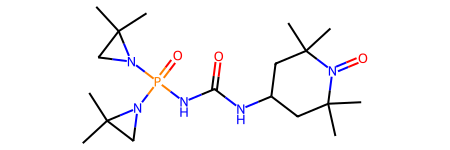

In [20]:
Chem.MolFromSmiles(df.loc[85675].smiles, sanitize=False)

In [21]:
df = df[df['smi_check'] == True]

In [22]:
df['smi_std'] = df['smiles'].apply(canonicalizer)

/var/folders/x6/gw8jkhr50_sdfyf0jrc9slj00000gn/T/ipykernel_17311/426347797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smi_std'] = df['smiles'].apply(canonicalizer)


In [23]:
df

,smiles,exp,smi_check,smi_std
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,1.77,True,Nc1ccc2cc3ccccc3nc2c1CO
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,2.1,True,CNc1ccc2cc3ccccc3nc2c1CO
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,2.2,True,CN(C)c1ccc2cc3ccccc3nc2c1CO
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,1.64,True,O=C1Nc2ccc3cc4ccccc4nc3c2CO1
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,1.54,True,CN(c1ccc2cc3ccc4c(c3nc2c1)COCN4)S(C)(=O)=O
...,...,...,...,...
85837,NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C...,-0.02,True,NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(=O)NC(Cc1cccc...
85838,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=C(O)C=...,-1.34,True,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(Cc1ccc(O)cc1)...
85839,NC(CC1=CC=CC=C1)C(=O)NCC(=O)NCC(=O)NC(CC1=CC=C...,-1.51,True,NC(Cc1ccccc1)C(=O)NCC(=O)NCC(=O)NC(Cc1ccccc1)C...
85840,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=CC=C1)C(...,-1.03,True,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(Cc1ccccc1)C(=O)O


/var/folders/x6/gw8jkhr50_sdfyf0jrc9slj00000gn/T/ipykernel_17311/288079656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['molwt'] = df.smi_std.apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))


<Axes: >

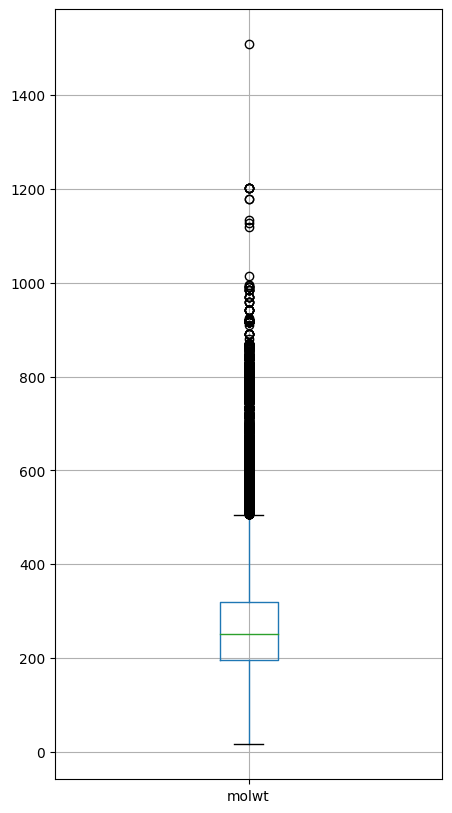

In [24]:
df['molwt'] = df.smi_std.apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
df.boxplot(column=['molwt'], figsize=(5, 10))

In [25]:
df[df.molwt >1000]

,smiles,exp,smi_check,smi_std,molwt
79326,[CH3:47][CH2:46][C@@H:45]1[NH:48][C:49](=[O:50...,-0.32,True,[CH3:1][N:2]1[C:3](=[O:4])[C@@H:5]([CH3:6])[NH...,1202.635
79556,CC(C)(C)C1=CC(CCC(=O)OCC(COC(=O)CCC2=CC(=C(O)C...,1.36,True,CC(C)(C)c1cc(CCC(=O)OCC(COC(=O)CCc2cc(C(C)(C)C...,1177.655
79761,CCC1NC(=O)C(C(O)C(C)C\C=C\C)N(C)C(=O)C(C(C)C)N...,2.92,True,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,1202.635
81663,[CH3:47][CH2:46][C@@H:45]1[NH:48][C:49](=[O:50...,-0.32,True,[CH3:1][N:2]1[C:3](=[O:4])[C@@H:5]([CH3:6])[NH...,1202.635
81781,CCC(C)[C@H](NC(=O)C1CCCN1C[C@@H](O)[C@H](CC1=C...,4.8751974,True,CCC(C)[C@H](NC(=O)C1CCCN1C[C@@H](O)[C@H](Cc1cc...,1133.861
81843,CC(=O)O[C@@]12CO[C@@H]1C[C@H](OC(=O)CN1CCN(CC1...,0.155,True,CC(=O)O[C@@]12CO[C@@H]1C[C@H](OC(=O)CN1CCN(c3c...,1015.126
82574,CC(C)(C)C1=CC(CCC(=O)OCC(COC(=O)CCC2=CC(=C(O)C...,1.36,True,CC(C)(C)c1cc(CCC(=O)OCC(COC(=O)CCc2cc(C(C)(C)C...,1177.655
82701,CC[C@@H]1NC(=O)[C@H]([C@H](O)[C@H](C)C\C=C\C)N...,2.92,True,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,1202.635
83975,CCC1NC(=O)C(C(O)C(C)C\C=C\C)N(C)C(=O)C(C(C)C)N...,2.92,True,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,1202.635
84861,CNCC(=O)NC(CCCNC(N)=N)C(=O)NC(C(C)C)C(=O)NC(CC...,0.903,True,CNCC(=O)NC(CCCNC(=N)N)C(=O)NC(C(=O)NC(Cc1ccc(O...,1508.537


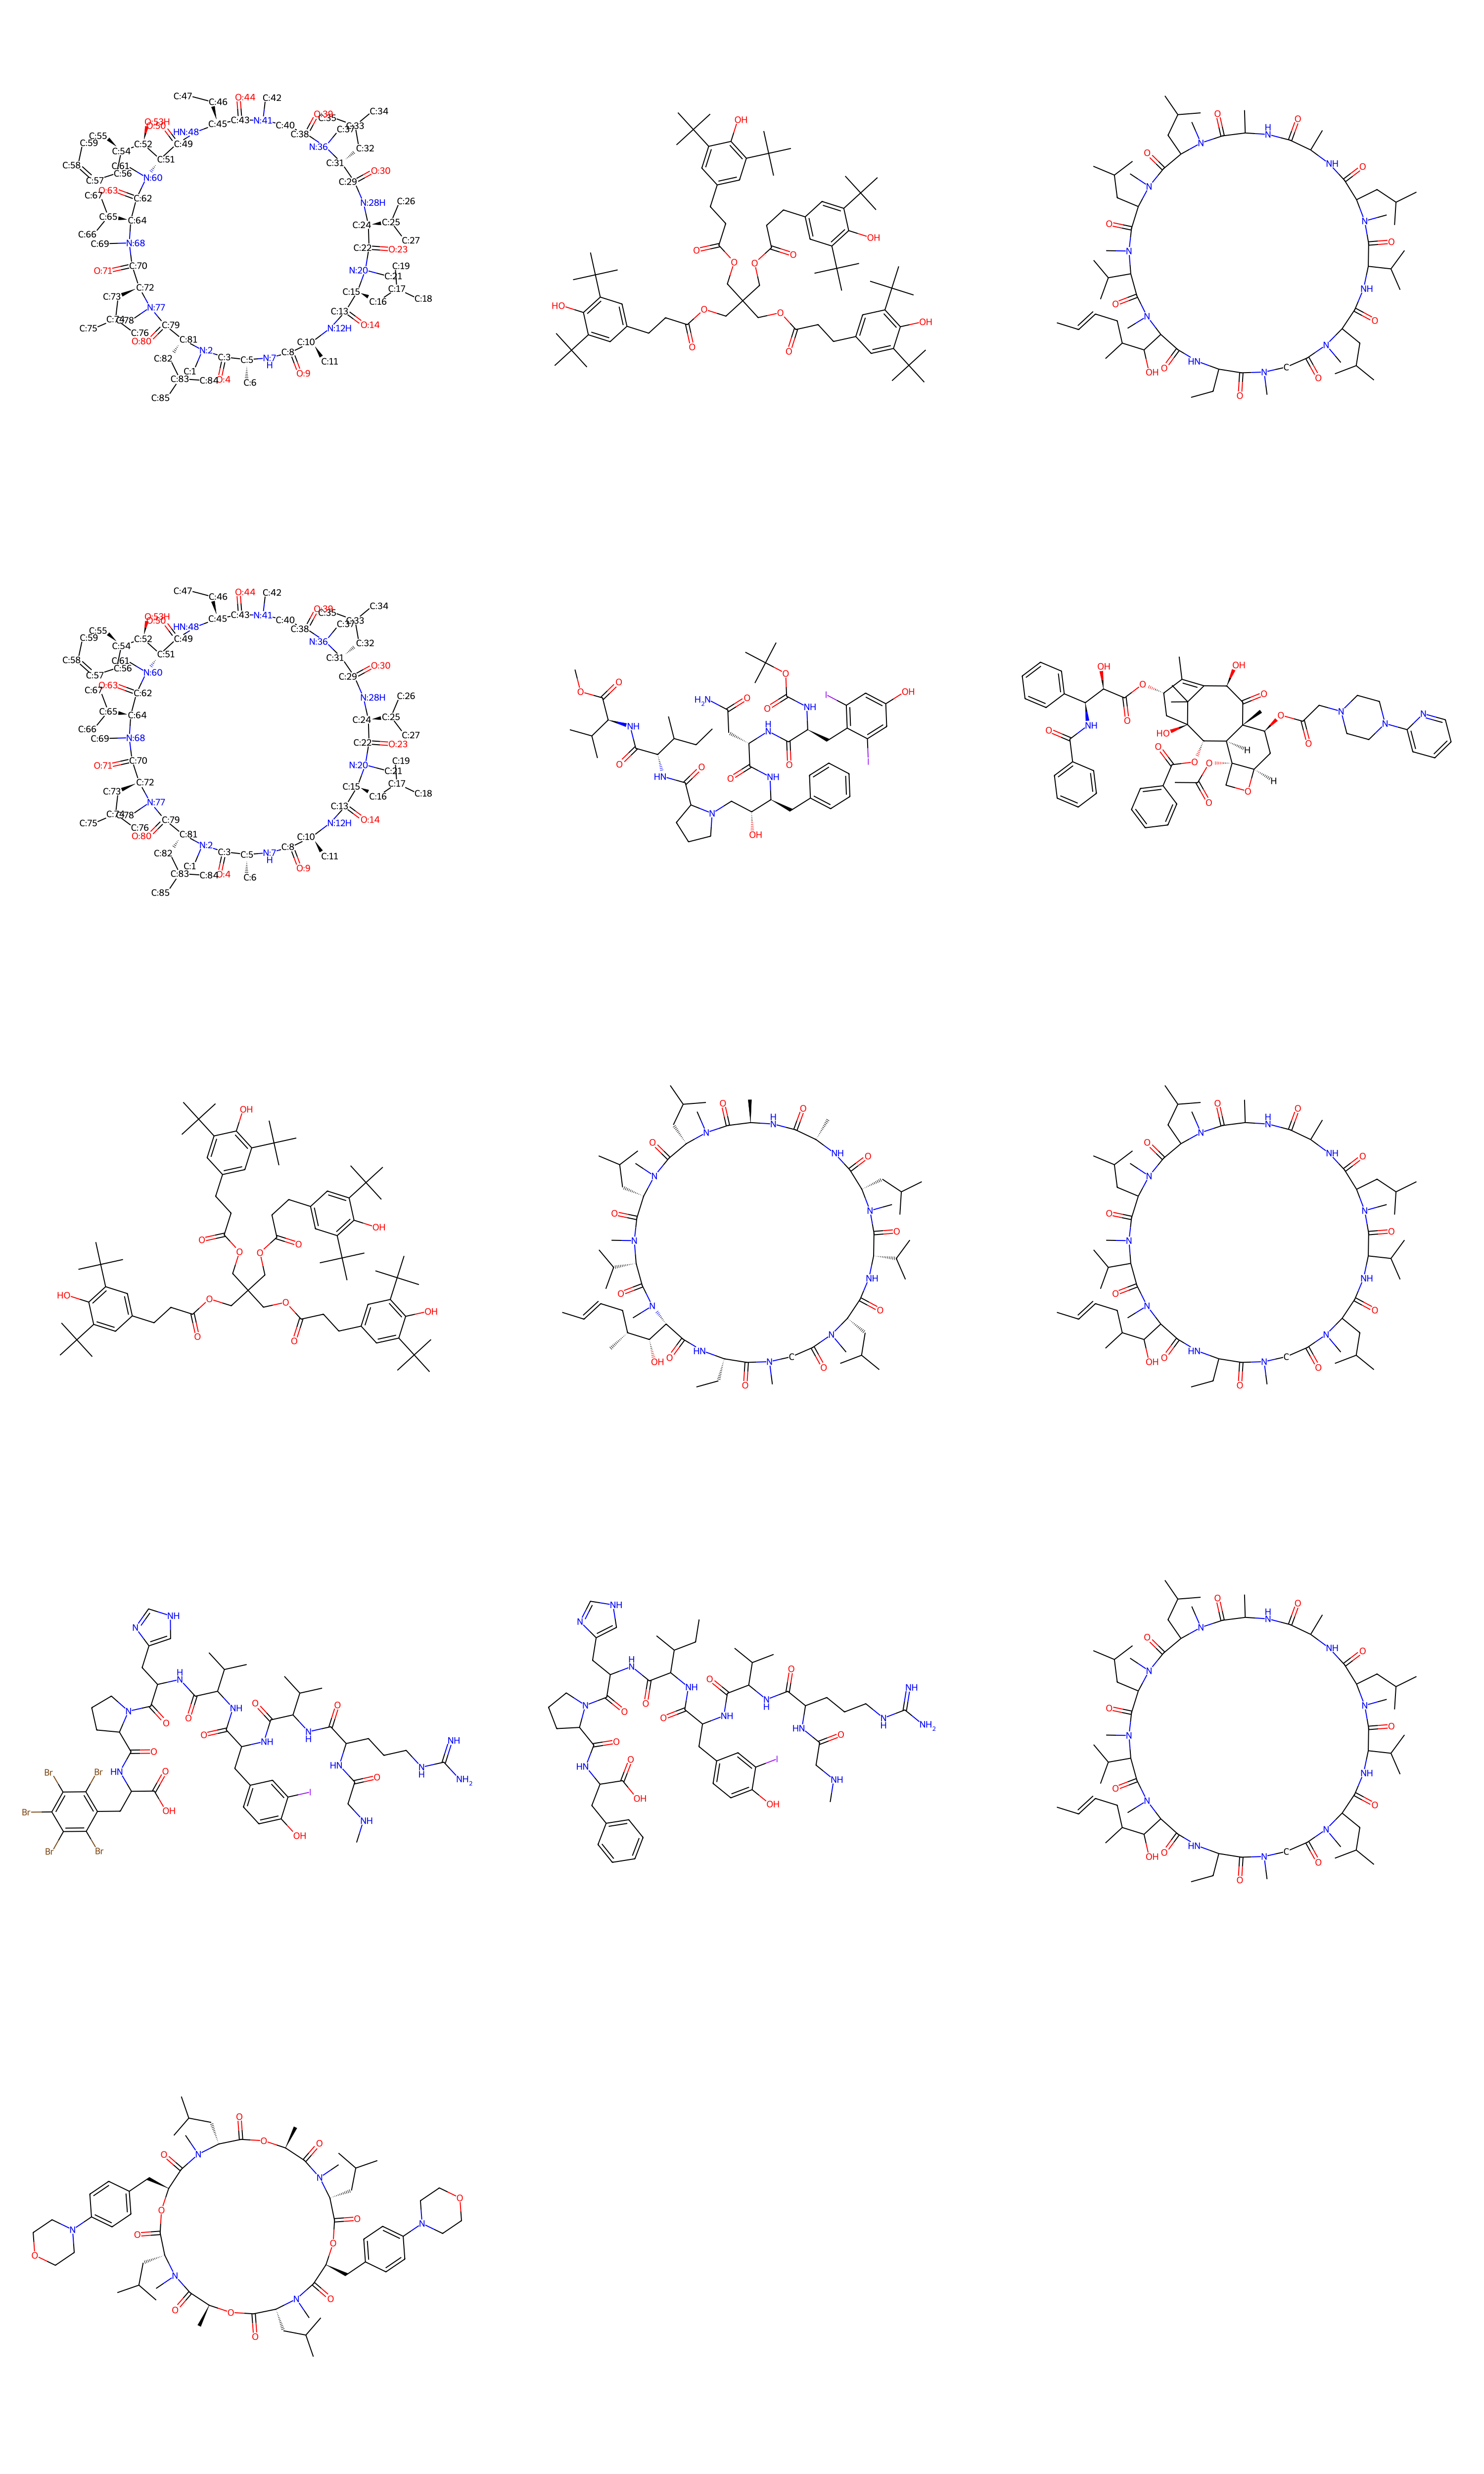

In [26]:
MolsToGridImage([Chem.MolFromSmiles(i) for i in 
                      df[df.molwt > 1000].smi_std], 
                     molsPerRow=3,subImgSize=(1000,1000))

In [27]:
df = df[df.molwt < 1000]

In [28]:
df

,smiles,exp,smi_check,smi_std,molwt
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,1.77,True,Nc1ccc2cc3ccccc3nc2c1CO,224.263
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,2.1,True,CNc1ccc2cc3ccccc3nc2c1CO,238.290
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,2.2,True,CN(C)c1ccc2cc3ccccc3nc2c1CO,252.317
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,1.64,True,O=C1Nc2ccc3cc4ccccc4nc3c2CO1,250.257
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,1.54,True,CN(c1ccc2cc3ccc4c(c3nc2c1)COCN4)S(C)(=O)=O,343.408
...,...,...,...,...,...
85837,NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C...,-0.02,True,NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(=O)NC(Cc1cccc...,459.546
85838,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=C(O)C=...,-1.34,True,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(Cc1ccc(O)cc1)...,407.511
85839,NC(CC1=CC=CC=C1)C(=O)NCC(=O)NCC(=O)NC(CC1=CC=C...,-1.51,True,NC(Cc1ccccc1)C(=O)NCC(=O)NCC(=O)NC(Cc1ccccc1)C...,426.473
85840,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=CC=C1)C(...,-1.03,True,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(Cc1ccccc1)C(=O)O,409.552


In [29]:
min(df.molwt)

16.043

In [30]:
MolsToGridImage([Chem.MolFromSmiles(i) for i in 
                      df[df.molwt < 50].smiles], 
                     molsPerRow=3,subImgSize=(1000,1000))

/Users/khakimova/Library/Caches/pypoetry/virtualenvs/qsar-model-workshop-Jf4LUvFv-py3.9/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


In [31]:
MolsToGridImage([Chem.MolFromSmiles(i) for i in 
                      df[df.molwt < 70].smiles], 
                     molsPerRow=3,subImgSize=(1000,1000))

In [32]:
df = df[df.molwt > 50]

# Анализ значений липофильности

In [33]:
df

,smiles,exp,smi_check,smi_std,molwt
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,1.77,True,Nc1ccc2cc3ccccc3nc2c1CO,224.263
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,2.1,True,CNc1ccc2cc3ccccc3nc2c1CO,238.290
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,2.2,True,CN(C)c1ccc2cc3ccccc3nc2c1CO,252.317
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,1.64,True,O=C1Nc2ccc3cc4ccccc4nc3c2CO1,250.257
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,1.54,True,CN(c1ccc2cc3ccc4c(c3nc2c1)COCN4)S(C)(=O)=O,343.408
...,...,...,...,...,...
85837,NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C...,-0.02,True,NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(=O)NC(Cc1cccc...,459.546
85838,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=C(O)C=...,-1.34,True,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(Cc1ccc(O)cc1)...,407.511
85839,NC(CC1=CC=CC=C1)C(=O)NCC(=O)NCC(=O)NC(CC1=CC=C...,-1.51,True,NC(Cc1ccccc1)C(=O)NCC(=O)NCC(=O)NC(Cc1ccccc1)C...,426.473
85840,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=CC=C1)C(...,-1.03,True,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(Cc1ccccc1)C(=O)O,409.552


In [34]:
df.boxplot(column=['exp'], figsize=(5, 10))

KeyError: "None of [Index(['exp'], dtype='object')] are in the [columns]"

In [35]:
df.astype({'exp': 'float'})

ValueError: could not convert string to float: '<-2.0': Error while type casting for column 'exp'

In [36]:
for exp_val in df.exp.to_list():
    try:
        float(exp_val)
    except Exception:
        print(exp_val)

<-2.0
<-2.0
0.92 +- 0.12
1.87 +- 0.08
4.69 +- 0.01
5.6 - 5.9
1.27 +- 0.04
1.57 +- 0.03
1.65 +- 0.02
2.22 +- 0.11
2.6 +- 0.01
1.95 +- 0.04
0.93 +- 0.07
1.97 +- 0.11
1.97 +- 0.01
2.27 +- 0.08
2.57 +- 0.08
2.0 +- 0.02
2.54 +- 0.02
5.86 +- 0.07
2.12 +- 0.01
2.59 +- 0.04
3.15 +- 0.08
5.74 +- 0.22
5.94 +- 0.15
6.78 +- 0.3
6.81 +- 0.08
7.37 +- 0.12
7.39 +- 0.27
7.32 +- 0.14
7.24 +- 0.16
8.05 +- 0.31
7.9 +- 0.14
7.82 +- 0.16
8.27 +- 0.26
0.571 +- 0.017
1.114 +- 0.107
0.925 +- 0.008
0.479 +- 0.004
1.01 +- 0.01
0.9 +- 0.28
0.14 +- 0.06
0.73 +- 0.12
1.3 +- 0.1
0.06 +- 0.08
0.95 +- 0.06
0.77 +- 0.06
1.33 +- 0.03


In [37]:
def obj2float(exp_value):
    try:
        exp_val = float(exp_value)
        return exp_val
    except Exception:
        return None

In [38]:
df['exp']= df['exp'].apply(obj2float)

/var/folders/x6/gw8jkhr50_sdfyf0jrc9slj00000gn/T/ipykernel_17311/2068504446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exp']= df['exp'].apply(obj2float)


In [39]:
df

,smiles,exp,smi_check,smi_std,molwt
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,1.77,True,Nc1ccc2cc3ccccc3nc2c1CO,224.263
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,2.10,True,CNc1ccc2cc3ccccc3nc2c1CO,238.290
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,2.20,True,CN(C)c1ccc2cc3ccccc3nc2c1CO,252.317
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,1.64,True,O=C1Nc2ccc3cc4ccccc4nc3c2CO1,250.257
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,1.54,True,CN(c1ccc2cc3ccc4c(c3nc2c1)COCN4)S(C)(=O)=O,343.408
...,...,...,...,...,...
85837,NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C...,-0.02,True,NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(=O)NC(Cc1cccc...,459.546
85838,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=C(O)C=...,-1.34,True,CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(Cc1ccc(O)cc1)...,407.511
85839,NC(CC1=CC=CC=C1)C(=O)NCC(=O)NCC(=O)NC(CC1=CC=C...,-1.51,True,NC(Cc1ccccc1)C(=O)NCC(=O)NCC(=O)NC(Cc1ccccc1)C...,426.473
85840,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(CC1=CC=CC=C1)C(...,-1.03,True,CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(Cc1ccccc1)C(=O)O,409.552


In [40]:
df.hist(column=['exp'])

array([[<Axes: title={'center': 'exp'}>]], dtype=object)

In [41]:
min(df.exp)

-11.96

In [42]:
max(df.exp)

15.6

In [43]:
df = df[(df.exp < 6) & (df.exp > -1)]

In [44]:
df.count()

smiles       68145
exp          68145
smi_check    68145
smi_std      68145
molwt        68145
dtype: int64

In [45]:
df = df.drop_duplicates()

In [46]:
df

,smiles,exp,smi_check,smi_std,molwt
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,1.77,True,Nc1ccc2cc3ccccc3nc2c1CO,224.263
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,2.10,True,CNc1ccc2cc3ccccc3nc2c1CO,238.290
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,2.20,True,CN(C)c1ccc2cc3ccccc3nc2c1CO,252.317
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,1.64,True,O=C1Nc2ccc3cc4ccccc4nc3c2CO1,250.257
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,1.54,True,CN(c1ccc2cc3ccc4c(c3nc2c1)COCN4)S(C)(=O)=O,343.408
...,...,...,...,...,...
85818,CN(CC1=CC=CC=C1)C(=O)C(CC1=CC=CC=C1)NC(=O)C(CC...,3.47,True,CN(Cc1ccccc1)C(=O)C(Cc1ccccc1)NC(=O)C(Cc1cn(C=...,716.839
85830,CCCCC(OC(CC1=CC=CC=C1)C(=O)N1CCC(CC1)OCOC)C(=O...,4.00,True,CCCCC(OC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC...,785.044
85832,[O-][N+](=O)C1=CC=CC=C1OCC(=O)O[Sn](C1=CC=CC=C...,2.27,True,O=C(COc1ccccc1[N+](=O)[O-])O[Sn](c1ccccc1)(c1c...,546.167
85833,[O-][N+](=O)C1=CC(OCC(=O)O[Sn](C2=CC=CC=C2)(C2...,2.19,True,O=C(COc1cccc([N+](=O)[O-])c1)O[Sn](c1ccccc1)(c...,546.167


In [47]:
df = df.groupby('smi_std').agg(set)

In [48]:
df['non_unique_vals'] = df.exp.apply(lambda x: len(x))

In [49]:
df[df['non_unique_vals']!=1]

,smiles,exp,smi_check,molwt,non_unique_vals
smi_std,,,,,
BrC(Br)Br,{BrC(Br)Br},"{2.4, 2.67}",{True},{252.731},2
BrCBr,{BrCBr},"{1.7, 1.88}",{True},{173.83499999999998},2
BrCCBr,{BrCCBr},"{1.96, 1.738}",{True},{187.862},2
Brc1cc(Br)c(N=C2NCCN2)c(Br)c1,{BrC1=CC(Br)=C(N=C2NCCN2)C(Br)=C1},"{2.54, 2.75}",{True},{397.8960000000001},2
Brc1ccc(-c2ccccc2)cc1,{BrC1=CC=C(C=C1)C1=CC=CC=C1},"{4.96, 4.95}",{True},{233.108},2
...,...,...,...,...,...
c1ccncc1,{C1=CC=NC=C1},"{0.65, 0.6}",{True},{79.10199999999998},2
c1ccsc1,{S1C=CC=C1},"{1.81, 1.89}",{True},{84.14299999999999},2
c1cn[nH]c1,{N1C=CC=N1},"{0.26, 0.13}",{True},{68.079},2


In [50]:
df = df[df['non_unique_vals']==1]

In [52]:
df.reset_index(inplace=True)

In [55]:
df['exp'] = df.exp.apply(lambda x: x.pop())

In [56]:
df

,smi_std,smiles,exp,smi_check,molwt,non_unique_vals
0,Br/C=C/Br,{Br\C=C\Br},1.76,{True},{185.84599999999998},1
1,Br/C=C\Br,{Br\C=C/Br},1.76,{True},{185.84599999999998},1
2,BrC(Br)(Br)Br,{BrC(Br)(Br)Br},3.42,{True},{331.62699999999995},1
3,BrC1=NC(Br)N=N1,{BrC1N=NC(Br)=N1},2.24,{True},{226.85899999999998},1
4,BrC1C2CC3C(C2)C13,{BrC1C2C3CC1CC23},3.11,{True},{173.053},1
...,...,...,...,...,...,...
18158,c1nnc[nH]1,{N1C=NN=C1},-0.58,{True},{69.067},1
18159,c1nnn(C23CC4CC(CC(C4)C2)C3)n1,{C1C2CC3CC1CC(C2)(C3)N1N=CN=N1},2.95,{True},{204.27699999999993},1
18160,c1nnn[nH]1,{N1C=NN=N1},-0.60,{True},{70.05499999999999},1
18161,c1nnnn1C12CC3CC(CC(C3)C1)C2,{C1C2CC3CC1CC(C2)(C3)N1C=NN=N1},2.95,{True},{204.27699999999996},1


# Генерация фингерпринтов

Более подробно про фингерпринты можно почитать тут: https://greglandrum.github.io/rdkit-blog/posts/2023-01-18-fingerprint-generator-tutorial.html

In [57]:
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048, countSimulation=True)

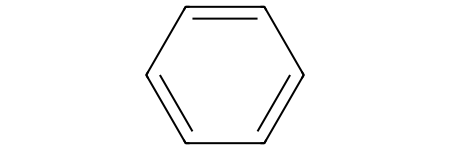

In [58]:
m = Chem.MolFromSmiles('c1ccccc1')
m

In [59]:
fp_benzene = mfpgen.GetFingerprint(m)

In [60]:
print('len {}'.format(len(fp_benzene)))

len 2048


In [61]:
mfpgen.GetFingerprintAsNumPy(m)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [62]:
df['std_mol'] = df['smi_std'].apply(Chem.MolFromSmiles)

In [63]:
fp_array = [mfpgen.GetFingerprintAsNumPy(i) for i in df.std_mol]

In [64]:
fp_array

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dt

In [65]:
X_train, X_test, y_train, y_test = train_test_split(fp_array, df.exp, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [66]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()

In [67]:
print("train set {}\nvalidation set {}\ntest set {}".format(len(X_train), len(X_val), len(X_test)))

train set 13122
validation set 2316
test set 2725


# Построим dummy модель

In [68]:
from sklearn.dummy import DummyRegressor

In [69]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

DummyRegressor()

In [70]:
y_train_predict = dummy_regr.predict(X_train)
mean_squared_error(y_true=y_train_predict, y_pred=y_train)

2.334689303162107

In [71]:
y_val_predict = dummy_regr.predict(X_val)
mean_squared_error(y_true=y_val_predict, y_pred=y_val)

2.3603406308741017

In [72]:
y_test_predict = dummy_regr.predict(X_test)
mean_squared_error(y_true=y_test_predict, y_pred=y_test)

2.424253958467577

# Построим линейную регрессию

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)

LinearRegression()

In [75]:
def get_metrics(model, x_train, y_train, x_test, y_test, x_val, y_val):
    y_train_predict = model.predict(X_train)
    train_mse = mean_squared_error(y_true=y_train_predict, y_pred=y_train)
    
    y_val_predict = model.predict(X_val)
    val_mse = mean_squared_error(y_true=y_val_predict, y_pred=y_val)
    
    y_test_predict = model.predict(X_test)
    test_mse = mean_squared_error(y_true=y_test_predict, y_pred=y_test)
    
    print('train MSE {},\nvalidation MSE {},\ntest MSE {}'.format(train_mse, val_mse, test_mse))

In [76]:
get_metrics(linear_regr, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, x_val=X_val, y_val=y_val)

train MSE 0.4927051222288618,
validation MSE 1.1599332337958607e+22,
test MSE 2.1581873661229333e+22


# Построим дерево принятия решений

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
decision_tree_regr = DecisionTreeRegressor(random_state=0)

In [80]:
decision_tree_regr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [81]:
get_metrics(decision_tree_regr, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, x_val=X_val, y_val=y_val)

train MSE 0.002869280863977056,
validation MSE 0.926656608566216,
test MSE 1.0225521522441812


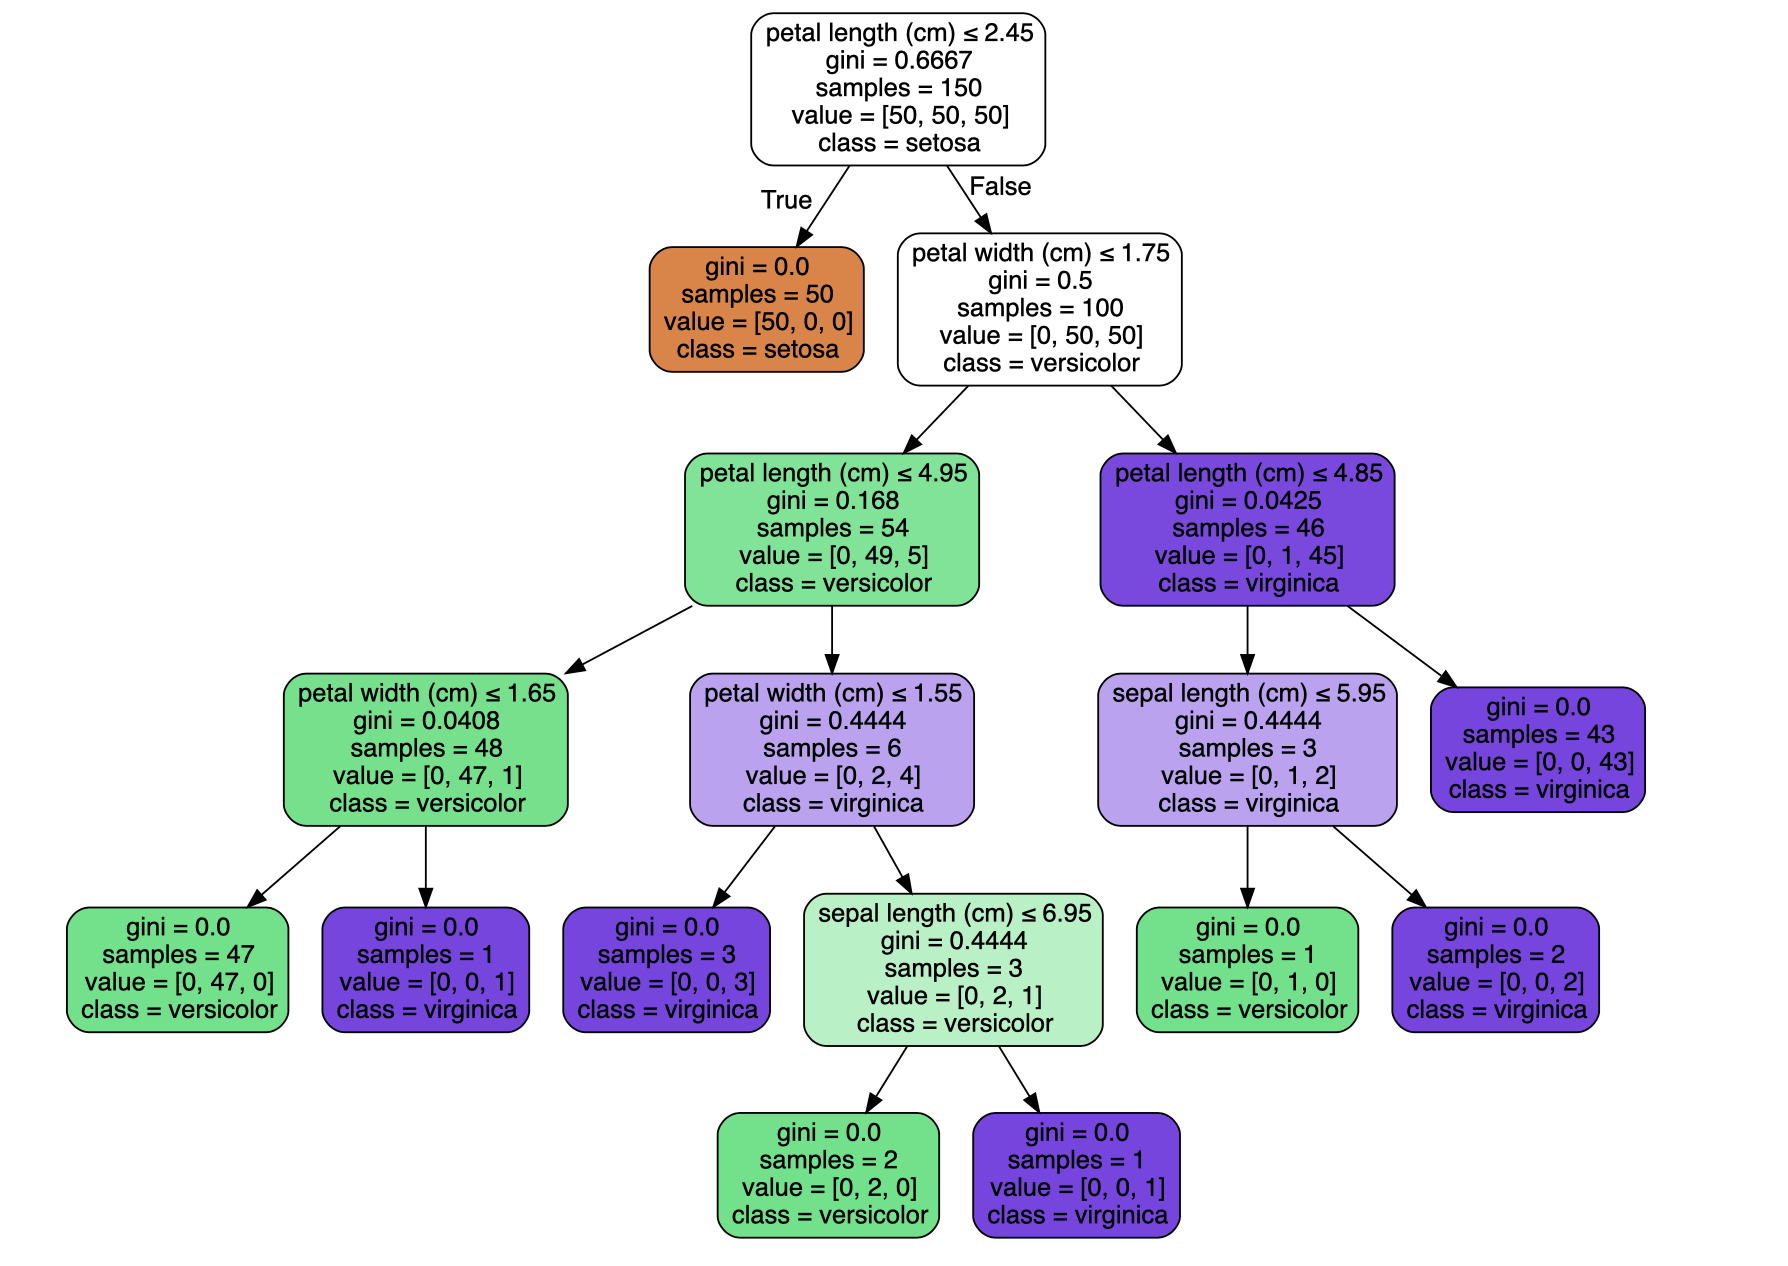

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
random_forest_regr = RandomForestRegressor(max_depth=5, random_state=42)

In [84]:
random_forest_regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [85]:
get_metrics(random_forest_regr, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, x_val=X_val, y_val=y_val)

train MSE 1.4748907387317818,
validation MSE 1.5622129097711734,
test MSE 1.6283299013467518


# Сгенерируем count дескрипторы

In [86]:
from sklearn import preprocessing

In [87]:
mfpgen.GetCountFingerprintAsNumPy(m)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint32)

In [88]:
df['std_mol'] = df['smi_std'].apply(Chem.MolFromSmiles)
fp_array_counted = [mfpgen.GetCountFingerprintAsNumPy(i) for i in df.std_mol]

In [89]:
set(list(fp_array_counted[10]))

{0, 1, 2, 3}

In [90]:
normalizer = preprocessing.Normalizer().fit(fp_array_counted)

In [91]:
normalizer

Normalizer()

In [92]:
normalizer.transform(fp_array_counted)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])